In [180]:
import numpy as np
import pandas as pd

from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import numpy as np
import pandas as pd
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import text
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction import text
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
# models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
# metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
from collections import Counter

# import warnings
# warnings.filterwarnings("ignore")
# %matplotlib inline

In [20]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [138]:
data = pd.read_csv("/content/drive/MyDrive/datasets/ml_homework/IMDB-Movie-Data.csv")
data.head(4)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0


In [139]:
##########################
# analize - are there any NaN values. 
##########################
data.isna().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [140]:
##########################
# dataset columns rename
##########################
data.rename({'Runtime (Minutes)':'Runtime', 'Revenue (Millions)':'Revenue'}, 
                    axis=1, inplace=True)

In [141]:
##########################
# dropping possible NaN values
##########################

data = data[data.Revenue.notnull()]
data = data[data.Runtime.notnull()]
data = data[data.Rating.notnull()]
data

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
993,994,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
994,995,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0


In [142]:
data.describe()

,Rank,Year,Runtime,Rating,Votes,Revenue,Metascore
count,872.000000,872.000000,872.000000,872.000000,8.720000e+02,872.000000,838.000000
mean,492.735092,2012.478211,114.783257,6.814335,1.909701e+05,82.956376,59.575179
std,288.134843,3.183552,18.633144,0.881674,1.921325e+05,103.253540,16.952416
min,1.000000,2006.000000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,243.750000,2010.000000,101.000000,6.300000,6.062750e+04,13.270000,47.000000
50%,488.500000,2013.000000,112.000000,6.900000,1.346540e+05,47.985000,60.000000
75%,739.250000,2015.000000,125.000000,7.500000,2.678330e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [143]:
data.corr()

,Rank,Year,Runtime,Rating,Votes,Revenue,Metascore
Rank,1.000000,-0.308472,-0.236892,-0.235158,-0.296847,-0.271592,-0.195909
Year,-0.308472,1.000000,-0.099359,-0.151539,-0.364052,-0.126790,-0.062303
Runtime,-0.236892,-0.099359,1.000000,0.377635,0.379100,0.267953,0.221397
Rating,-0.235158,-0.151539,0.377635,1.000000,0.515770,0.217654,0.672731
Votes,-0.296847,-0.364052,0.379100,0.515770,1.000000,0.639661,0.332674
Revenue,-0.271592,-0.126790,0.267953,0.217654,0.639661,1.000000,0.142397
Metascore,-0.195909,-0.062303,0.221397,0.672731,0.332674,0.142397,1.000000


In [144]:
##########################
# prepare features values
##########################

revenue_features = data['Runtime']
revenue_features

0      121
1      124
2      117
3      108
4      123
      ... 
993     97
994     88
996     94
997     98
999     87
Name: Runtime, Length: 872, dtype: int64

In [158]:
##########################
# convert features values to numpy array
##########################

X = revenue_features.to_numpy()
# display(X, X.shape)
# check the values in the array
# X[0][1]
# X = X.reshape(1, -1)
X.shape

(872,)

In [159]:
##########################
# prepare labels values and convert to numpy array
##########################
y = data['Rating'].to_numpy()
# y = y.reshape(1, -1)
y.shape

(872,)

In [165]:
##########################
# train, test split and scaling the features values
##########################
# sc = StandardScaler()
# X_train, X_test, y_train, y_test = train_test_split(sc.fit_transform(X), y, random_state=42)

##########################
# train, test split
##########################
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, train_size = 0.67, random_state=42)
print(X_train[0])
print(y_train[0])

111
5.8


In [168]:
##########################
# reshaping to 2d arrays
##########################
X_train= X_train.reshape(-1, 1)
X_test= X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [169]:
##########################
# train base regressor
##########################
regressor = Ridge(alpha=0.01) 
regressor.fit(X_train, y_train)
preds = regressor.predict(X_test)

In [170]:
##########################
# display errors
##########################
mean_absolute_error(y_test, preds)
mean_squared_error(y_test, preds)

0.7121901038877926

In [179]:
##########################
# r2 score
##########################
r2_score(y_test, preds)

0.12357056637498676

In [176]:
##########################
# analize performance of different algorithms
##########################

num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

models = []
models.append(('LIN_REG', LinearRegression()))
models.append(('RIDGE', Ridge(alpha=0.01)))
models.append(('LASSO', Lasso()))
models.append(('ELASTIC', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('DECISION_TREE', DecisionTreeRegressor()))

# display the mean and standard deviation of MSE (neg_mean_squared_error) for each algorithm
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = f"{name}, {cv_results.mean()}, {cv_results.std()}"
    print(msg)

LIN_REG, -0.6494242945053935, 0.17427492022616084
RIDGE, -0.6494242943076404, 0.17427491946006154
LASSO, -0.6525545631129079, 0.17235263574334705
ELASTIC, -0.6502071110112173, 0.17323293239526952
KNN, -0.7738218819403857, 0.2158240330467495
DECISION_TREE, -0.7699747660843402, 0.19107195191409054


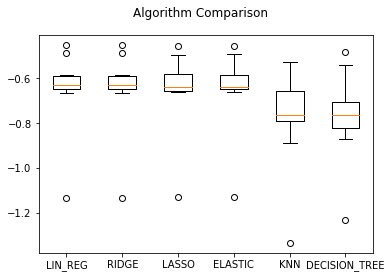

In [177]:
##########################
# compare algorithms on box plots
##########################
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()